In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 데이터 경로 설정
dataset_path = '/content/drive/MyDrive/kdt-20240312T072125Z-001/kdt/미니프로젝트3/re_d_img'

# 데이터 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 정규화
    validation_split=0.2)  # 20%를 검증 데이터로 사용

# 학습 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # 학습 데이터

# 검증 데이터 생성기
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 검증 데이터

# 클래스 확인
print("Class indices:", train_generator.class_indices)
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

# 모델 구축
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # num_classes로 수정
])

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25)

# 모델 평가
test_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

# 모델 저장
model.save('game_category_classifier.h5')

Found 1165 images belonging to 7 classes.
Found 288 images belonging to 7 classes.


Class indices: {'RPG': 0, '러닝': 1, '시뮬레이션': 2, '전략': 3, '퀴즈': 4, '퍼즐': 5, '하이퍼캐주얼': 6}
Number of classes: 7
Epoch 1/25
36/36 [==============================] - 31s 807ms/step - loss: 2.7174 - accuracy: 0.1589 - val_loss: 1.9437 - val_accuracy: 0.1736
Epoch 2/25
36/36 [==============================] - 28s 768ms/step - loss: 1.9446 - accuracy: 0.1695 - val_loss: 1.9353 - val_accuracy: 0.2292
Epoch 3/25
36/36 [==============================] - 27s 748ms/step - loss: 1.8980 - accuracy: 0.2418 - val_loss: 1.8414 - val_accuracy: 0.2292
Epoch 4/25
36/36 [==============================] - 27s 756ms/step - loss: 1.8617 - accuracy: 0.2754 - val_loss: 1.8000 - val_accuracy: 0.2535
Epoch 5/25
36/36 [==============================] - 26s 703ms/step - loss: 1.7722 - accuracy: 0.3124 - val_loss: 1.7630 - val_accuracy: 0.2778
Epoch 6/25
36/36 [==============================] - 27s 726ms/step - loss: 1.6825 - accuracy: 0.3433 - val_loss: 1.8382 - val_accuracy: 0.2743
Epoch 7/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 데이터 경로 설정
dataset_path = '/content/drive/MyDrive/kdt-20240312T072125Z-001/kdt/미니프로젝트3/re_g_img'

# 데이터 전처리 및 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # 20%를 검증 데이터로 사용

# 학습 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # 학습 데이터

# 검증 데이터 생성기
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 검증 데이터

# 클래스 확인
print("Class indices:", train_generator.class_indices)
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

# 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # num_classes로 수정
])

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# 학습률 감소 콜백
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25,
    callbacks=[reduce_lr]
)

# 모델 평가
test_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

# 모델 저장
model.save('game_category_classifier.h5')


Found 1385 images belonging to 11 classes.
Found 342 images belonging to 11 classes.
Class indices: {'레이싱': 0, '롤플레잉': 1, '스포츠': 2, '시뮬레이션': 3, '아케이드': 4, '액션': 5, '음악': 6, '전략': 7, '캐주얼': 8, '퀴즈': 9, '퍼즐': 10}
Number of classes: 11


Epoch 1/25
43/43 [==============================] - 20s 427ms/step - loss: 3.0378 - accuracy: 0.1663 - val_loss: 2.2533 - val_accuracy: 0.2344 - lr: 0.0010
Epoch 2/25
43/43 [==============================] - 20s 470ms/step - loss: 2.2566 - accuracy: 0.2047 - val_loss: 2.2303 - val_accuracy: 0.2375 - lr: 0.0010
Epoch 3/25
43/43 [==============================] - 18s 430ms/step - loss: 2.1991 - accuracy: 0.2343 - val_loss: 2.1486 - val_accuracy: 0.2750 - lr: 0.0010
Epoch 4/25
43/43 [==============================] - 20s 468ms/step - loss: 2.1880 - accuracy: 0.2380 - val_loss: 2.2243 - val_accuracy: 0.2531 - lr: 0.0010
Epoch 5/25
43/43 [==============================] - 20s 471ms/step - loss: 2.1465 - accuracy: 0.2735 - val_loss: 2.1364 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 6/25
43/43 [==============================] - 20s 469ms/step - loss: 2.0805 - accuracy: 0.2668 - val_loss: 2.1035 - val_accuracy: 0.2781 - lr: 0.0010
Epoch 7/25
43/43 [==============================] - 19s 434ms/st

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 데이터 경로 설정
dataset_path = '/content/drive/MyDrive/kdt-20240312T072125Z-001/kdt/미니프로젝트3/re_d_img'

# 데이터 전처리 및 증강
train_datagen = ImageDataGenerator(
    validation_split=0.2)  # 20%를 검증 데이터로 사용

# 학습 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # 학습 데이터

# 검증 데이터 생성기
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 검증 데이터

# 클래스 확인
print("Class indices:", train_generator.class_indices)
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

# 사전 학습된 VGG16 모델 로드 (include_top=False로 최종 레이어 제외)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 새로운 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 사전 학습된 레이어 고정
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 학습률 감소 콜백
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,  # Epoch 수 증가
    callbacks=[reduce_lr]
)

# 모델 평가
test_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

# 모델 저장
model.save('game_category_classifier_vgg16.h5')


Found 1165 images belonging to 7 classes.
Found 288 images belonging to 7 classes.
Class indices: {'RPG': 0, '러닝': 1, '시뮬레이션': 2, '전략': 3, '퀴즈': 4, '퍼즐': 5, '하이퍼캐주얼': 6}
Number of classes: 7


Epoch 1/50
36/36 [==============================] - 322s 9s/step - loss: 10.7990 - accuracy: 0.3248 - val_loss: 5.7194 - val_accuracy: 0.3819 - lr: 0.0010
Epoch 2/50
36/36 [==============================] - 8s 215ms/step - loss: 4.0832 - accuracy: 0.4545 - val_loss: 3.7660 - val_accuracy: 0.3958 - lr: 0.0010
Epoch 3/50
36/36 [==============================] - 8s 222ms/step - loss: 2.2740 - accuracy: 0.5481 - val_loss: 3.2353 - val_accuracy: 0.3681 - lr: 0.0010
Epoch 4/50
36/36 [==============================] - 9s 237ms/step - loss: 1.2908 - accuracy: 0.6478 - val_loss: 2.8232 - val_accuracy: 0.3611 - lr: 0.0010
Epoch 5/50
36/36 [==============================] - 9s 249ms/step - loss: 0.9437 - accuracy: 0.7061 - val_loss: 2.7372 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 6/50
36/36 [==============================] - 8s 215ms/step - loss: 0.7505 - accuracy: 0.7352 - val_loss: 2.7585 - val_accuracy: 0.3889 - lr: 0.0010
Epoch 7/50
36/36 [==============================] - 9s 241ms/step - lo

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 데이터 경로 설정
dataset_path = '/content/drive/MyDrive/kdt-20240312T072125Z-001/kdt/미니프로젝트3/re_g_img'

# 데이터 전처리 및 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # 회전 범위 확대
    width_shift_range=0.3,  # 좌우 이동 범위 확대
    height_shift_range=0.3,  # 상하 이동 범위 확대
    shear_range=0.3,  # 밀림 강도 확대
    zoom_range=0.3,  # 확대/축소 범위 확대
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # 20%를 검증 데이터로 사용

# 학습 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # 학습 데이터

# 검증 데이터 생성기
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 검증 데이터

# 클래스 확인
print("Class indices:", train_generator.class_indices)
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

# 사전 학습된 VGG16 모델 로드
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 사전 학습된 모델의 마지막 몇 개 레이어를 학습 가능하게 설정
for layer in base_model.layers[:15]:
    layer.trainable = False
for layer in base_model.layers[15:]:
    layer.trainable = True

# 새로운 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(lr=0.0001),  # 학습률 감소
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 학습률 감소 콜백
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,  # Epoch 수 증가
    callbacks=[reduce_lr]
)

# 모델 평가
test_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

# 모델 저장
model.save('game_category_classifier_vgg16_finetuned.h5')


Found 1385 images belonging to 11 classes.
Found 342 images belonging to 11 classes.
Class indices: {'레이싱': 0, '롤플레잉': 1, '스포츠': 2, '시뮬레이션': 3, '아케이드': 4, '액션': 5, '음악': 6, '전략': 7, '캐주얼': 8, '퀴즈': 9, '퍼즐': 10}
Number of classes: 11


Epoch 1/50
43/43 [==============================] - 23s 452ms/step - loss: 2.3812 - accuracy: 0.1589 - val_loss: 2.2482 - val_accuracy: 0.2031 - lr: 0.0010
Epoch 2/50
43/43 [==============================] - 19s 445ms/step - loss: 2.2616 - accuracy: 0.2033 - val_loss: 2.1461 - val_accuracy: 0.2469 - lr: 0.0010
Epoch 3/50
43/43 [==============================] - 20s 470ms/step - loss: 2.2060 - accuracy: 0.2373 - val_loss: 2.0564 - val_accuracy: 0.2969 - lr: 0.0010
Epoch 4/50
43/43 [==============================] - 19s 449ms/step - loss: 2.0802 - accuracy: 0.3008 - val_loss: 2.0125 - val_accuracy: 0.3063 - lr: 0.0010
Epoch 5/50
43/43 [==============================] - 22s 509ms/step - loss: 1.9753 - accuracy: 0.3245 - val_loss: 1.9803 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 6/50
43/43 [==============================] - 21s 489ms/step - loss: 1.9342 - accuracy: 0.3333 - val_loss: 1.9763 - val_accuracy: 0.3187 - lr: 0.0010
Epoch 7/50
43/43 [==============================] - 20s 476ms/st

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 데이터 경로 설정
dataset_path = '/content/drive/MyDrive/kdt-20240312T072125Z-001/kdt/미니프로젝트3/re_g_img'

# 데이터 전처리 및 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # 회전 범위 확대
    width_shift_range=0.3,  # 좌우 이동 범위 확대
    height_shift_range=0.3,  # 상하 이동 범위 확대
    shear_range=0.3,  # 밀림 강도 확대
    zoom_range=0.3,  # 확대/축소 범위 확대
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # 20%를 검증 데이터로 사용

# 학습 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # 학습 데이터

# 검증 데이터 생성기
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 검증 데이터

# 클래스 확인
print("Class indices:", train_generator.class_indices)
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

# 사전 학습된 ResNet50 모델 로드 (include_top=False로 최종 레이어 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 사전 학습된 모델의 마지막 몇 개 레이어를 학습 가능하게 설정
for layer in base_model.layers[:143]:  # ResNet50의 앞부분 레이어는 고정
    layer.trainable = False
for layer in base_model.layers[143:]:
    layer.trainable = True

# 새로운 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(lr=0.0001),  # 학습률 감소
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 학습률 감소 콜백
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,  # Epoch 수 증가
    callbacks=[reduce_lr]
)

# 모델 평가
test_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

# 모델 저장
model.save('game_category_classifier_resnet34.h5')

Found 1385 images belonging to 11 classes.
Found 342 images belonging to 11 classes.
Class indices: {'레이싱': 0, '롤플레잉': 1, '스포츠': 2, '시뮬레이션': 3, '아케이드': 4, '액션': 5, '음악': 6, '전략': 7, '캐주얼': 8, '퀴즈': 9, '퍼즐': 10}
Number of classes: 11
94765736/94765736 [==============================] - 5s 0us/step


Epoch 1/50
43/43 [==============================] - 33s 500ms/step - loss: 2.4444 - accuracy: 0.1722 - val_loss: 6.2591 - val_accuracy: 0.1969 - lr: 0.0010
Epoch 2/50
43/43 [==============================] - 21s 483ms/step - loss: 2.2496 - accuracy: 0.2321 - val_loss: 9.4835 - val_accuracy: 0.2156 - lr: 0.0010
Epoch 3/50
43/43 [==============================] - 20s 477ms/step - loss: 2.1892 - accuracy: 0.2631 - val_loss: 15.5005 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 4/50
43/43 [==============================] - 21s 479ms/step - loss: 2.1590 - accuracy: 0.2764 - val_loss: 4.7223 - val_accuracy: 0.2250 - lr: 0.0010
Epoch 5/50
43/43 [==============================] - 19s 450ms/step - loss: 2.1266 - accuracy: 0.2794 - val_loss: 2.6782 - val_accuracy: 0.2469 - lr: 0.0010
Epoch 6/50
43/43 [==============================] - 21s 479ms/step - loss: 2.1296 - accuracy: 0.2794 - val_loss: 3.8131 - val_accuracy: 0.2156 - lr: 0.0010
Epoch 7/50
43/43 [==============================] - 23s 527ms/s

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 데이터 경로 설정
dataset_path = '/content/drive/MyDrive/kdt-20240312T072125Z-001/kdt/미니프로젝트3/re_g_img'

# 데이터 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 정규화
    validation_split=0.2)  # 20%를 검증 데이터로 사용

# 학습 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # 학습 데이터

# 검증 데이터 생성기
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 검증 데이터

# 클래스 확인
print("Class indices:", train_generator.class_indices)
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

# 사전 학습된 VGG16 모델 로드 (include_top=False로 최종 레이어 제외)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 새로운 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 사전 학습된 레이어 고정
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 학습률 감소 콜백
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,  # Epoch 수 증가
    callbacks=[reduce_lr]
)

# 모델 평가
test_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

# 모델 저장
model.save('game_category_classifier_vgg16.h5')


Found 1385 images belonging to 11 classes.
Found 342 images belonging to 11 classes.
Class indices: {'레이싱': 0, '롤플레잉': 1, '스포츠': 2, '시뮬레이션': 3, '아케이드': 4, '액션': 5, '음악': 6, '전략': 7, '캐주얼': 8, '퀴즈': 9, '퍼즐': 10}
Number of classes: 11


Epoch 1/50
43/43 [==============================] - 11s 238ms/step - loss: 2.1449 - accuracy: 0.2868 - val_loss: 1.9403 - val_accuracy: 0.3719 - lr: 0.0010
Epoch 2/50
43/43 [==============================] - 10s 242ms/step - loss: 1.8620 - accuracy: 0.3740 - val_loss: 1.9446 - val_accuracy: 0.3469 - lr: 0.0010
Epoch 3/50
43/43 [==============================] - 11s 251ms/step - loss: 1.7260 - accuracy: 0.4080 - val_loss: 1.8971 - val_accuracy: 0.3313 - lr: 0.0010
Epoch 4/50
43/43 [==============================] - 10s 241ms/step - loss: 1.6514 - accuracy: 0.4368 - val_loss: 1.9119 - val_accuracy: 0.3562 - lr: 0.0010
Epoch 5/50
43/43 [==============================] - 10s 221ms/step - loss: 1.5993 - accuracy: 0.4597 - val_loss: 1.8948 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 6/50
43/43 [==============================] - 10s 234ms/step - loss: 1.5232 - accuracy: 0.4738 - val_loss: 1.9309 - val_accuracy: 0.3594 - lr: 0.0010
Epoch 7/50
43/43 [==============================] - 10s 238ms/st

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import regularizers

# 데이터 경로 설정
dataset_path = '/content/drive/MyDrive/kdt-20240312T072125Z-001/kdt/미니프로젝트3/re_g_img'


# 데이터 전처리 및 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # 20%를 검증 데이터로 사용

# 학습 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # 학습 데이터

# 검증 데이터 생성기
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 검증 데이터

# 클래스 확인
print("Class indices:", train_generator.class_indices)
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

# 사전 학습된 VGG16 모델 로드 (include_top=False로 최종 레이어 제외)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 새로운 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 사전 학습된 레이어 고정
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 학습률 감소와 조기 종료 콜백
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    callbacks=[reduce_lr, early_stop]
)

# 모델 평가
test_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

# 모델 저장
model.save('game_category_classifier_vgg16.h5')


Found 1385 images belonging to 11 classes.
Found 342 images belonging to 11 classes.
Class indices: {'레이싱': 0, '롤플레잉': 1, '스포츠': 2, '시뮬레이션': 3, '아케이드': 4, '액션': 5, '음악': 6, '전략': 7, '캐주얼': 8, '퀴즈': 9, '퍼즐': 10}
Number of classes: 11


Epoch 1/50
43/43 [==============================] - 22s 486ms/step - loss: 2.5637 - accuracy: 0.2720 - val_loss: 2.2997 - val_accuracy: 0.3250 - lr: 0.0010
Epoch 2/50
43/43 [==============================] - 20s 473ms/step - loss: 2.1934 - accuracy: 0.3333 - val_loss: 2.1974 - val_accuracy: 0.3250 - lr: 0.0010
Epoch 3/50
43/43 [==============================] - 20s 475ms/step - loss: 2.0589 - accuracy: 0.3792 - val_loss: 2.1657 - val_accuracy: 0.3406 - lr: 0.0010
Epoch 4/50
43/43 [==============================] - 20s 471ms/step - loss: 2.0236 - accuracy: 0.3695 - val_loss: 2.1266 - val_accuracy: 0.3281 - lr: 0.0010
Epoch 5/50
43/43 [==============================] - 21s 477ms/step - loss: 1.9606 - accuracy: 0.3777 - val_loss: 2.1276 - val_accuracy: 0.3156 - lr: 0.0010
Epoch 6/50
43/43 [==============================] - 20s 465ms/step - loss: 1.9087 - accuracy: 0.4013 - val_loss: 2.1260 - val_accuracy: 0.3250 - lr: 0.0010
Epoch 7/50
43/43 [==============================] - 19s 452ms/st

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import regularizers

# 데이터 경로 설정
dataset_path = '/content/drive/MyDrive/kdt-20240312T072125Z-001/kdt/미니프로젝트3/re_d_img'


# 데이터 전처리 및 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # 20%를 검증 데이터로 사용

# 학습 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # 학습 데이터

# 검증 데이터 생성기
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 검증 데이터

# 클래스 확인
print("Class indices:", train_generator.class_indices)
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

# 사전 학습된 VGG16 모델 로드 (include_top=False로 최종 레이어 제외)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 새로운 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 사전 학습된 레이어 고정
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 학습률 감소와 조기 종료 콜백
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    callbacks=[reduce_lr, early_stop]
)

# 모델 평가
test_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

# 모델 저장
model.save('game_category_classifier_vgg16.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# 데이터 경로 설정
dataset_path = '/content/drive/MyDrive/kdt-20240312T072125Z-001/kdt/미니프로젝트3/re_d_img'

# 데이터 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 정규화
    validation_split=0.2)  # 20%를 검증 데이터로 사용

# 훈련 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # 훈련 데이터

# 훈련 데이터에 오버샘플링 적용
x_train = []
y_train = []

for i in range(len(train_generator)):
    img, label = train_generator[i]
    for j in range(img.shape[0]):
        x_train.append(img[j])
        y_train.append(label[j])

x_train = np.array(x_train)
y_train = np.array(y_train)

y_train_flat = np.argmax(y_train, axis=1)

ros = RandomOverSampler()
x_train_flat, y_train_resampled = ros.fit_resample(x_train.reshape(x_train.shape[0], -1), y_train_flat)

x_train_resampled = x_train_flat.reshape(-1, 150, 150, 3)
y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled, num_classes=7)

# 모델 구축
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# 오버샘플링 전의 트레인 데이터 수
original_train_samples = len(x_train)

print("Original number of training samples:", original_train_samples)

# 오버샘플링 적용 후의 트레인 데이터 수
oversampled_train_samples = len(x_train_resampled)

print("Number of training samples after oversampling:", oversampled_train_samples)

# 모델 학습
history = model.fit(
    x_train_resampled, y_train_resampled,
    batch_size=32,
    epochs=25,
    validation_split=0.2)

# 모델 저장
model.save('game_category_classifier.h5')


Found 929 images belonging to 6 classes.


Original number of training samples: 929
Number of training samples after oversampling: 1224
Epoch 1/25
31/31 [==============================] - 3s 35ms/step - loss: 2.3366 - accuracy: 0.1726 - val_loss: 1.9386 - val_accuracy: 0.0000e+00
Epoch 2/25
31/31 [==============================] - 1s 22ms/step - loss: 1.7825 - accuracy: 0.2237 - val_loss: 1.8890 - val_accuracy: 0.0204
Epoch 3/25
31/31 [==============================] - 1s 22ms/step - loss: 1.6983 - accuracy: 0.2942 - val_loss: 1.8498 - val_accuracy: 0.0490
Epoch 4/25
31/31 [==============================] - 1s 21ms/step - loss: 1.6298 - accuracy: 0.3269 - val_loss: 1.8681 - val_accuracy: 0.0571
Epoch 5/25
31/31 [==============================] - 1s 22ms/step - loss: 1.6017 - accuracy: 0.3422 - val_loss: 1.8196 - val_accuracy: 0.1143
Epoch 6/25
31/31 [==============================] - 1s 27ms/step - loss: 1.5529 - accuracy: 0.3912 - val_loss: 1.7743 - val_accuracy: 0.1224
Epoch 7/25
31/31 [==============================] - 1s 24

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 전처리 및 이미지 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 정규화
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # 20%를 검증 데이터로 사용

# 훈련 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # 훈련 데이터

# 검증 데이터 생성기
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 검증 데이터

# 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(6, activation='softmax')
])

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=150)

# 모델 저장
model.save('game_category_classifier.h5')


Found 929 images belonging to 6 classes.
Found 229 images belonging to 6 classes.


Epoch 1/150
29/29 [==============================] - 18s 405ms/step - loss: 1.8245 - accuracy: 0.1918 - val_loss: 1.7835 - val_accuracy: 0.2143
Epoch 2/150
29/29 [==============================] - 15s 531ms/step - loss: 1.7798 - accuracy: 0.2241 - val_loss: 1.7802 - val_accuracy: 0.2188
Epoch 3/150
29/29 [==============================] - 14s 490ms/step - loss: 1.7536 - accuracy: 0.2453 - val_loss: 1.6777 - val_accuracy: 0.2812
Epoch 4/150
29/29 [==============================] - 13s 441ms/step - loss: 1.7495 - accuracy: 0.2720 - val_loss: 1.7518 - val_accuracy: 0.2634
Epoch 5/150
29/29 [==============================] - 13s 442ms/step - loss: 1.7365 - accuracy: 0.2598 - val_loss: 1.7110 - val_accuracy: 0.2366
Epoch 6/150
29/29 [==============================] - 13s 441ms/step - loss: 1.6897 - accuracy: 0.2832 - val_loss: 1.6614 - val_accuracy: 0.3348
Epoch 7/150
29/29 [==============================] - 13s 438ms/step - loss: 1.6544 - accuracy: 0.2954 - val_loss: 1.6747 - val_accuracy:

1/1 [==============================] - 0s 312ms/step


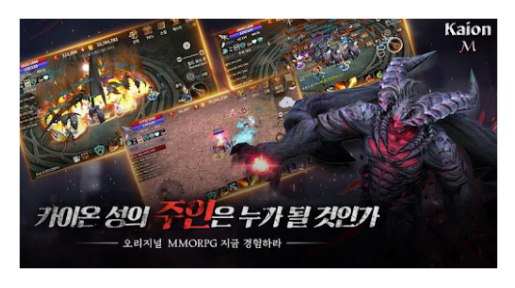

예측: RPG


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)  # 이미지 크기 조정
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # [0, 1]로 재조정

    return img_array

# 테스트할 이미지의 파일 경로 설정
image_path = '/content/rpg.png'

# 이미지 로딩 및 전처리
test_image = load_and_preprocess_image(image_path)

# 모델 로드
model = load_model('game_category_classifier.h5')

# 예측 수행
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

# 이미지 출력
img = load_img(image_path)
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()

# 예측 결과 출력
index = ['RPG', '러닝', '시뮬레이션', '전략', '퀴즈', '퍼즐']
print('예측: {}'.format(index[predicted_class]))

1/1 [==============================] - 0s 183ms/step


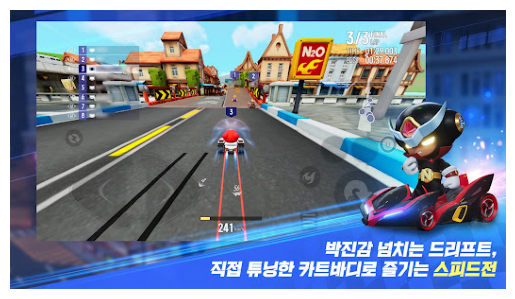

예측: 시뮬레이션


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)  # 이미지 크기 조정
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # [0, 1]로 재조정

    return img_array

# 테스트할 이미지의 파일 경로 설정
image_path = '/content/cart.jpg'

# 이미지 로딩 및 전처리
test_image = load_and_preprocess_image(image_path)

# 모델 로드
model = load_model('game_category_classifier.h5')

# 예측 수행
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

# 이미지 출력
img = load_img(image_path)
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()

# 예측 결과 출력
index = ['RPG', '러닝', '시뮬레이션', '전략', '퀴즈', '퍼즐']
print('예측: {}'.format(index[predicted_class]))

1/1 [==============================] - 0s 121ms/step


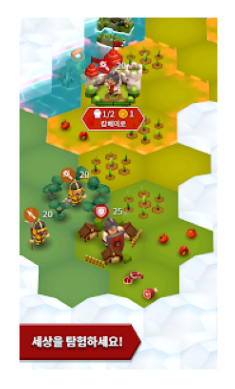

예측: 퀴즈


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)  # 이미지 크기 조정
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # [0, 1]로 재조정

    return img_array

# 테스트할 이미지의 파일 경로 설정
image_path = '/content/tactic.png'

# 이미지 로딩 및 전처리
test_image = load_and_preprocess_image(image_path)

# 모델 로드
model = load_model('game_category_classifier.h5')

# 예측 수행
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

# 이미지 출력
img = load_img(image_path)
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()

# 예측 결과 출력
index = ['RPG', '러닝', '시뮬레이션', '전략', '퀴즈', '퍼즐']
print('예측: {}'.format(index[predicted_class]))